In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import linalg

from src import eigenproblem
from src.utils import print_matrix

pd.options.display.float_format = "{:,.16f}".format
np.set_printoptions(precision=16, suppress=True)


def answer(a: np.array, eps: float) -> None:
    print("Исходная матрица:", end="")
    print_matrix(a)

    print("Степенной метод")
    (eigenvalue1, eigenvector1, count1) = eigenproblem.solve_partial(
        a, eigenproblem.PartialEigenproblemMethod.PowerMethod
    )
    print("Максимальное по модулю собственное число:", eigenvalue1)
    print("Собственный вектор:", eigenvector1)
    print("Количество итераций:", count1)

    print("Метод скалярных произведений")
    (eigenvalue2, eigenvector2, count2) = eigenproblem.solve_partial(
        a, eigenproblem.PartialEigenproblemMethod.DotProductMethod
    )
    print("Максимальное по модулю собственное число:", eigenvalue2)
    print("Собственный вектор:", eigenvector2)
    print("Количество итераций:", count2)

In [2]:
# This matrix is bad for this method -- it has two identical eigenvalues
a1 = np.array([[1, 4, 2], [-1, 5, 1], [0, 0, 1]])
answer(a1, 10e-6)

Исходная матрица:      
 1 4 2
-1 5 1
 0 0 1
Степенной метод
Максимальное по модулю собственное число: 3.0054643348167156
Собственный вектор: [0.8939388021549941 0.4481890427059707 0.                ]
Количество итераций: 547
Метод скалярных произведений
Максимальное по модулю собственное число: 3.0038642828411346
Собственный вектор: [0.8937386766072773 0.4485879823805721 0.                ]
Количество итераций: 387


In [3]:
a1_prime = np.array([[1, 0, 0], [0, 3, 1], [0, 0, 3]])
answer(a1_prime, 10e-6)

Исходная матрица:     
1 0 0
0 3 1
0 0 3
Степенной метод
Максимальное по модулю собственное число: 3.0054642604953927
Собственный вектор: [0.                 0.9999851246106252 0.0054544071604692]
Количество итераций: 548
Метод скалярных произведений
Максимальное по модулю собственное число: 3.0038600287302515
Собственный вектор: [0.                 0.9999704452649112 0.0076882115407389]
Количество итераций: 388


In [4]:
a2 = linalg.hilbert(4)
answer(a2, 10e-12)

Исходная матрица:                                                                           
1.0000000000000000 0.5000000000000000 0.3333333333333333 0.2500000000000000
0.5000000000000000 0.3333333333333333 0.2500000000000000 0.2000000000000000
0.3333333333333333 0.2500000000000000 0.2000000000000000 0.1666666666666667
0.2500000000000000 0.2000000000000000 0.1666666666666667 0.1428571428571428
Степенной метод
Максимальное по модулю собственное число: 1.5002142777524257
Собственный вектор: [0.7926046284719213 0.4519254522554451 0.3224196050681156
 0.2521644043006846]
Количество итераций: 5
Метод скалярных произведений
Максимальное по модулю собственное число: 1.5002142762313007
Собственный вектор: [0.7925966156477381 0.4519305523959188 0.3224266197171468
 0.2521714804902528]
Количество итераций: 5


In [5]:
a3 = np.array([[1, 4, 2], [-1, 5, 1], [0, 0, 1]])

iter_count = 100

x = np.linspace(10e-6, 10e-12, num=iter_count, endpoint=False)
power_method_count = []
dot_product_method_count = []
for i in range(iter_count):
    (_, _, count1) = eigenproblem.solve_partial(
        a3, eigenproblem.PartialEigenproblemMethod.PowerMethod, eps=x[i]
    )
    power_method_count.append(count1)
    (_, _, count2) = eigenproblem.solve_partial(
        a3, eigenproblem.PartialEigenproblemMethod.DotProductMethod, eps=x[i]
    )
    dot_product_method_count.append(count2)

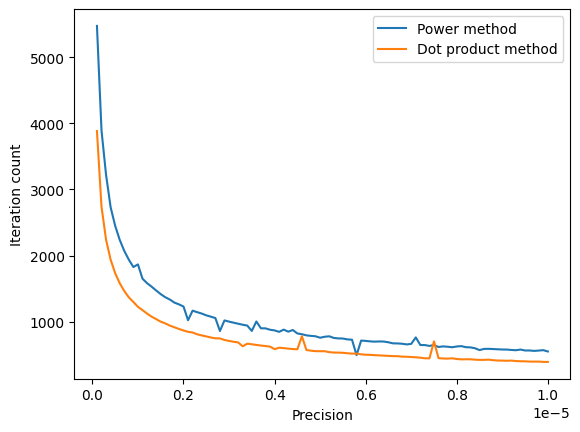

In [6]:
(power_method,) = plt.plot(x, power_method_count, label="Power method")
(dot_product_method,) = plt.plot(
    x, dot_product_method_count, label="Dot product method"
)
plt.legend(handles=[power_method, dot_product_method], loc="best")
plt.xlabel("Precision")
plt.ylabel("Iteration count")
plt.show()